In [21]:
import composeml as cp
import featuretools as ft

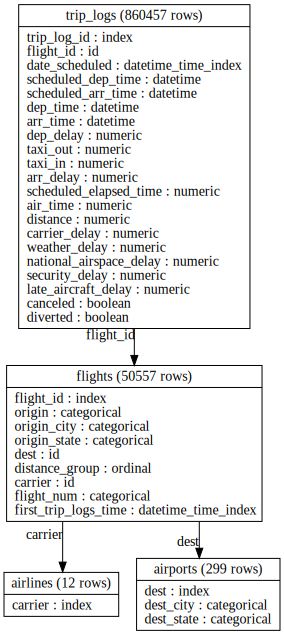

In [2]:
es = ft.demo.load_flight()
es.plot()

In [88]:
def flight_delay(df):
    value = df.arr_time.sub(df.scheduled_arr_time)
    value = value.abs().mean()
    return value

In [89]:
lm = cp.LabelMaker(
    target_entity='flight_id',
    labeling_function=flight_delay,
    time_index='date_scheduled',
    window_size='1w',
)

In [81]:
slices = lm.slice(
    es['trip_logs'].df,
    num_examples_per_instance=-1,
    minimum_data='2016-09',
)

In [84]:
ds = next(slices)
print(ds)
ds

slice_number                                             2
flight_id                                 AA-1002:MIA->DFW
window          [2016-09-04 00:00:00, 2016-09-11 00:00:00)
gap             [2016-09-04 00:00:00, 2016-09-11 00:00:00)


,trip_log_id,flight_id,scheduled_dep_time,scheduled_arr_time,dep_time,arr_time,dep_delay,taxi_out,taxi_in,arr_delay,scheduled_elapsed_time,air_time,distance,carrier_delay,weather_delay,national_airspace_delay,security_delay,late_aircraft_delay,canceled,diverted
date_scheduled,,,,,,,,,,,,,,,,,,,,
2016-09-04,231242,AA-1002:MIA->DFW,2017-01-02 20:15:00,2017-01-02 23:36:00,2017-01-02 21:19:00,2017-01-03 00:32:00,64.0,25.0,4.0,56.0,12060000000000,164.0,1121.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0
2016-09-05,231243,AA-1002:MIA->DFW,2017-01-03 20:15:00,2017-01-03 23:36:00,2017-01-03 20:48:00,2017-01-04 00:29:00,33.0,51.0,5.0,53.0,12060000000000,165.0,1121.0,20.0,0.0,20.0,0.0,13.0,0.0,0.0
2016-09-06,231244,AA-1002:MIA->DFW,2017-01-04 20:15:00,2017-01-04 23:36:00,2017-01-04 20:15:00,2017-01-04 23:40:00,0.0,31.0,5.0,4.0,12060000000000,169.0,1121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-09-07,231245,AA-1002:MIA->DFW,2017-01-05 20:15:00,2017-01-05 23:36:00,2017-01-05 20:52:00,2017-01-05 23:54:00,37.0,14.0,3.0,18.0,12060000000000,165.0,1121.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0
2016-09-08,231246,AA-1002:MIA->DFW,2017-01-06 20:15:00,2017-01-06 23:36:00,2017-01-06 20:15:00,2017-01-06 23:38:00,0.0,23.0,3.0,2.0,12060000000000,177.0,1121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-09-09,231247,AA-1002:MIA->DFW,2017-01-07 20:30:00,2017-01-07 23:49:00,2017-01-07 20:29:00,2017-01-07 23:32:00,-1.0,12.0,4.0,-17.0,11940000000000,167.0,1121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-09-10,231248,AA-1002:MIA->DFW,2017-01-08 20:15:00,2017-01-08 23:33:00,2017-01-08 21:26:00,2017-01-09 00:30:00,71.0,14.0,10.0,57.0,11880000000000,160.0,1121.0,15.0,0.0,0.0,0.0,42.0,0.0,0.0


In [86]:
flight_delay(ds)

Timedelta('0 days 00:29:34.285714')

In [90]:
lt = lm.search(
    es['trip_logs'].df,
    num_examples_per_instance=-1,
    minimum_data='2016-09',
)

Elapsed: 06:14 | Remaining: 00:00 | Progress: 100%|██████████| flight_id: 50557/50557 


In [104]:
lt.count

,count
flight_id,
AA-1002:MIA->DFW,10
AA-1003:TUS->JFK,10
AA-1004:AUS->DFW,10
AA-1004:DFW->AUS,10
AA-1005:PHX->DFW,2
...,...
WN-999:SFO->LAX,9
WN-9:DAL->HOU,10
WN-9:HOU->MSY,7
